In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import transpose
import numpy.random as nu
from random import *
import math 
import time as t
from sympy import symbols, solve
from scipy.optimize import fsolve, root
from numpy.polynomial import polynomial as P

from scipy.optimize import minimize, Bounds, LinearConstraint
from scipy.optimize import fmin_slsqp

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

In [2]:
#Game theoretic theory states that the optimal bet b is a function, in non-diag case, of the elements of the odds matrix:

def bbest1(o,p):
    S=np.array([])
    oi=np.linalg.inv(o)
    for i in range(len(o)):
        for j in range(len(o)):
            S=np.append(S,oi[i,j]/sum(oi[:,j]))   #Constructing eq. 12's \omega_xy
            
    S=np.reshape(S,(3,3))        #making S to be a matrix
    S=S*p                        #Pointwise multiplication (eq 14 without the sum over y)
    b=np.array([])
    for bi in S:
        b=np.append(b,sum(bi))   #this gives the sum over y
    b/=sum(b)                    #normalization I don't get why
    return b

In [3]:
# Probability and odds
p=np.array([0.2,0.5,0.3])   #Same parameters of Amshuman
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])

In [4]:
#Defining the maximization 

def maxim(o,p):
    
    def J(b,o=o,p=p,a=1):
        log=(np.log(sum(o[0]*b)),np.log(sum(o[1]*b)),np.log(sum(o[2]*b)))
        log2=((np.log(sum(o[0]*b)))**2,(np.log(sum(o[1]*b)))**2,(np.log(sum(o[2]*b)))**2)
        return -np.dot(p,log)*a+(1-a)*(np.dot(p,log2)-(np.dot(p,log))**2)

    # Define the linear constraint as before
    linear_constraint = LinearConstraint([[1, 1, 1]], [1], [1])

    # Define the bounds as before
    bounds = [(0, 1), (0, 1), (0, 1)]

    # Minimize the negative of the objective function
    res = minimize(J, [1/3, 1/3, 1/3], method='trust-constr', constraints=[linear_constraint], bounds=bounds)

    # The maximum value of the original function is the negative of the minimum value found above
    max_value = -res.fun
    
    return res.x


In [5]:
#Define the figure plotting both the analytical solution and the KKT maximized one

def figure(o,p,filename):
    oi=np.linalg.inv(o)
    for i in range(21):
        p0=i/20
        p1=p[1]/(p[2]+p[1])*(20-i)/20
        p2=p[2]/(p[2]+p[1])*(20-i)/20
        px=np.array([p0,p1,p2])
        
        b0,b1,b2=maxim(o,px)
        #print(p0)
        #print(b1)
        plot(p0,b0,'.g')
        plot(p0,b1,'.r')
        plot(p0,b2,'.b')
    b0=[]
    b1=[]
    b2=[]
    for i in range(101):
        p0=i/100
        p1=p[1]/(p[2]+p[1])*(101-i)/100
        p2=p[2]/(p[2]+p[1])*(101-i)/100
        px=np.array([p0,p1,p2])
        bx=bbest1(o,px)
        #print(p0)
        
        
        for j in range(3):
            if bx[j]<0:
                bx[j]=0                           #I added this 'for' loop since it was checking if only bx[0] was between 0 and 1, now all
                bx/=sum(bx)
            if bx[j]>1:
                bx=np.array([0,0,0])
                bx[j]=1
        #print(bx)
        
        b0.append(bx[0])
        b1.append(bx[1])
        b2.append(bx[2])
        
        
    pstar=(np.sum(oi[:,0]))/np.sum(oi)
    print('optimal strategy on the first horse, for the environment p0*={}'.format(pstar))
        
    plot(np.arange(0,1.01,0.01),b0,'g',label=r'$b_0^*$')
    plot(np.arange(0,1.01,0.01),b1,'r',label=r'$b_1^*$')
    plot(np.arange(0,1.01,0.01),b2,'b',label=r'$b_2^*$')
    plt.plot(pstar*np.ones(50),np.linspace(0,1),linestyle='dashed',color='black',label='p0*')
    
    plt.legend()
    
    xlabel('$p_0$',fontsize=18)
    ylabel('$b*$',fontsize=18)
    
    
    #savefig(filename)

In [6]:
#bets optimum for diagonal odds
#figure(od,p,'diagcomp.pdf')
show()


#bets optimum for non diagonal odds
#figure(ond,p,'non-diagcomp.pdf')
show()


In [7]:
#As we can see, the theoretical line doesn't work where b0=0 because the game is not fully-mixing, at least for player 1 (the gambler)

In [8]:
#Let's try now to colour the plot wrt to the growth rate

def figureW(o,p,filename):
    oi=np.linalg.inv(o)
    for i in range(21):
        p0=i/20
        p1=p[1]/(p[2]+p[1])*(20-i)/20
        p2=p[2]/(p[2]+p[1])*(20-i)/20
        px=np.array([p0,p1,p2])
        
        b0,b1,b2=maxim(o,px)
        
        plot(p0,b0,'.g')
        plot(p0,b1,'.r')
        plot(p0,b2,'.b')
        
    b0=[]
    b1=[]
    b2=[]
    for i in range(101):
        p0=i/100
        p1=p[1]/(p[2]+p[1])*(101-i)/100
        p2=p[2]/(p[2]+p[1])*(101-i)/100
        px=np.array([p0,p1,p2])
        bx=bbest1(o,px)
        
        for j in range(3):
            if bx[j]<0:
                bx[j]=0                           #I added this 'for' loop since it was checking if only bx[0] was between 0 and 1, now all
                bx/=sum(bx)
            if bx[j]>1:
                bx=np.array([0,0,0])
                bx[j]=1
        
        b0.append(bx[0])
        b1.append(bx[1])
        b2.append(bx[2])
        
    W=np.zeros((1000,1000))
    prob=p = np.linspace(0, 1, 1000)
    bets = np.linspace(0, 1, 1000)
    P, B = np.meshgrid(prob, bets)
    for bs in bets:
        for ps in prob:
            pr=np.zeros(3)
            br=np.zeros(3)
            pr[0]=ps
            pr[1]=p[1]/(p[2]+p[1])*(1-ps)
            pr[2]=p[2]/(p[2]+p[1])*(1-ps)
            br[0]=bs
            br[1]=p[1]/(p[2]+p[1])*(1-bs)
            br[2]=p[2]/(p[2]+p[1])*(1-bs)
            log=(np.log(sum(o[0]*br)),np.log(sum(o[1]*br)),np.log(sum(o[2]*br)))
            W[int(ps*1000)-1,int(bs*1000)-1]=np.dot(pr,log)
            
       
        
    plt.scatter(P, B, c=W, cmap=plt.cm.get_cmap('jet'))

    # add color bar
    cbar = plt.colorbar()
    cbar.set_label(r'$\langle W \rangle$')
        
    pstar=(np.sum(oi[:,0]))/np.sum(oi)
    print(pstar)   
        
    plt.plot(pstar*np.ones(50),np.linspace(0,1),linestyle='dashed',color='black',label='p0*')     
    plot(np.arange(0,1.01,0.01),b0,'g',label=r'$b_0^*$')
    plot(np.arange(0,1.01,0.01),b1,'r',label=r'$b_1^*$')
    plot(np.arange(0,1.01,0.01),b2,'b',label=r'$b_2^*$')
    
    xlabel('$p_0$',fontsize=18)
    ylabel('$b*$',fontsize=18)
    plt.legend()
    savefig(filename)
    plt.show()
    

In [9]:
# Probability and odds
p=np.array([0.2,0.5,0.3])   #Same parameters of Amshuman
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])


###figureW(od,p,'diag-W.png')   # color plot 1

In [10]:
###figureW(ond,p,'nondiag-W.png') color plot2

In [11]:
#Let's try with new cases for p and o's, without showing the avg growth rate

p=np.array([0.2,0.3,0.5])   #New values
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])

In [12]:
#bets optimum for diagonal odds
#figure(od,p,'diag')
show()


#bets optimum for non diagonal odds
#figure(ond,p,'non-diag')
show()


In [13]:
p=np.array([0.33,0.33,0.33])   #New values
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])

In [14]:
#bets optimum for diagonal odds
#figure(od,p,'diag')
show()


#bets optimum for non diagonal odds
#figure(ond,p,'non-diag')
show()

KKT ACTUAL MAXIMIZATION

In [15]:
#Let's try to implement KKT conditions to solve the minimization
p=np.array([0.2,0.5,0.3])   #Same parameters of Amshuman
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])

def KKTreal(o,p):
    
    if o[0,1]!=0 or o[0,2]!=0 or o[1,0]!=0 or o[1,2]!=0 or o[2,0]!=0 or o[2,1]!=0:
    
        
        #case bi=0
        for i in np.linspace(0,2,3):
            i=int(i)
            def equation1(vars,i):

                if i==0:
                    j=1
                    k=2
                elif i==1:
                    j=0
                    k=2
                elif i==2:
                    j=0
                    k=1
                    
                bj, bk, li, u = vars
                eq1 = p[0]*(o[0,i]/(o[0,j]*bj+o[0,k]*bk))+p[1]*(o[1,i]/(o[1,j]*bj+o[1,k]*bk))+p[2]*(o[2,i]/(o[2,j]*bj+o[2,k]*bk))+li+u
                eq2 = p[0]*(o[0,j]/(o[0,j]*bj+o[0,k]*bk))+p[1]*(o[1,j]/(o[1,j]*bj+o[1,k]*bk))+p[2]*(o[2,j]/(o[2,j]*bj+o[2,k]*bk))+u
                eq3 = p[0]*(o[0,k]/(o[0,j]*bj+o[0,k]*bk))+p[1]*(o[1,k]/(o[1,j]*bj+o[1,k]*bk))+p[2]*(o[2,k]/(o[2,j]*bj+o[2,k]*bk))+u
                eq4 = bj+bk-1
                return [eq1, eq2, eq3, eq4]
            initial_guess = [0.5, 0.5, 0.5, -1]  # Initial guess for the solution
            solution = fsolve(lambda vars: equation1(vars, i), initial_guess)
            if solution[0]>0 and solution[1]>0 and solution[2]>0:
                if i==0:
                    return 0,solution[0],solution[1]
                if i==1:
                    return solution[0],0,solution[1]
                if i==2:
                    return solution[0],solution[1],0

        #case bi=bj=0
        for k in np.linspace(0,2,3):
            k=int(k)
            def equation2(vars,k):
                if k==0:
                    j=1
                    i=2
                elif k==1:
                    j=0
                    i=2
                elif k==2:
                    j=0
                    i=1
                
                lj,li = vars
                eq1=p[0]*(o[0,i]/o[0,k])+p[1]*(o[1,i]/o[1,k])+p[2]*(o[2,i]/o[2,k])-1+li
                eq2=p[0]*(o[0,j]/o[0,k])+p[1]*(o[1,j]/o[1,k])+p[2]*(o[2,j]/o[2,k])-1+lj
                return [eq1,eq2]
            initial_guess = [0.5, 0.5]  # Initial guess for the solution
            solution = fsolve(lambda vars: equation2(vars, k), initial_guess)
            if solution[0]>0 and solution[1]>0:
                if k==0:
                    return 1,0,0
                if k==1:
                    return 0,1,0
                if k==2:
                    return 0,0,1

        
    def equation3(vars):
        b0,b1,b2,u=vars
        eq1=p[0]*(o[0,0]/(o[0,0]*b0+o[0,1]*b1+o[0,2]*b2))+p[1]*(o[1,0]/(o[1,0]*b0+o[1,1]*b1+o[1,2]*b2))+p[2]*(o[2,0]/(o[2,0]*b0+o[2,1]*b1+o[2,2]*b2))+u
        eq2=p[0]*(o[0,1]/(o[0,0]*b0+o[0,1]*b1+o[0,2]*b2))+p[1]*(o[1,1]/(o[1,0]*b0+o[1,1]*b1+o[1,2]*b2))+p[2]*(o[2,1]/(o[2,0]*b0+o[2,1]*b1+o[2,2]*b2))+u
        eq3=p[0]*(o[0,2]/(o[0,0]*b0+o[0,1]*b1+o[0,2]*b2))+p[1]*(o[1,2]/(o[1,0]*b0+o[1,1]*b1+o[1,2]*b2))+p[2]*(o[2,2]/(o[2,0]*b0+o[2,1]*b1+o[2,2]*b2))+u
        eq4=b0+b1+b2-1
        return [eq1,eq2,eq3,eq4]
    initial_guess = [0.33, 0.33, 0.33,-1]  # Initial guess for the solution
    solution = fsolve(equation3, initial_guess)
    if solution[0]>0 and solution[1]>0 and solution[2]>0:
        return solution[0],solution[1],solution[2]

In [16]:
#Define the figure plotting both the analytical solution and the KKT maximized one

def figureKKT(o,p,filename):
    oi=np.linalg.inv(o)
    
    if o[0,1]!=0 or o[0,2]!=0 or o[1,0]!=0 or o[1,2]!=0 or o[2,0]!=0 or o[2,1]!=0:
        for i in range(21):
            p0=i/20
            p1=p[1]/(p[2]+p[1])*(20-i)/20
            p2=p[2]/(p[2]+p[1])*(20-i)/20
            px=np.array([p0,p1,p2])

            b0,b1,b2=KKTreal(o,px)
            #print(p0)
            #print(b1)
            plot(p0,b0,'.g')
            plot(p0,b1,'.r')
            plot(p0,b2,'.b')
        b0=[]
        b1=[]
        b2=[]
    else:
        for i in np.linspace(2,17,20):
            p0=i/20
            p1=p[1]/(p[2]+p[1])*(20-i)/20
            p2=p[2]/(p[2]+p[1])*(20-i)/20
            px=np.array([p0,p1,p2])

            b0,b1,b2=KKTreal(o,px)
            #print(p0)
            #print(b1)
            plot(p0,b0,'.g')
            plot(p0,b1,'.r')
            plot(p0,b2,'.b')
        b0=[]
        b1=[]
        b2=[]
        
        
        
    for i in range(101):
        p0=i/100
        p1=p[1]/(p[2]+p[1])*(101-i)/100
        p2=p[2]/(p[2]+p[1])*(101-i)/100
        px=np.array([p0,p1,p2])
        bx=bbest1(o,px)
        #print(p0)
        
        
        for j in range(3):
            if bx[j]<0:
                bx[j]=0                           #I added this 'for' loop since it was checking if only bx[0] was between 0 and 1, now all
                bx/=sum(bx)
            if bx[j]>1:
                bx=np.array([0,0,0])
                bx[j]=1
        #print(bx)
        
        b0.append(bx[0])
        b1.append(bx[1])
        b2.append(bx[2])
        
        
        
        
    plot(np.arange(0,1.01,0.01),b0,'g',label=r'$b_0$')
    plot(np.arange(0,1.01,0.01),b1,'r',label=r'$b_1$')
    plot(np.arange(0,1.01,0.01),b2,'b',label=r'$b_2$')
    plt.legend()
    
    xlabel(r'$p_0$',fontsize=18)
    ylabel(r'$b*$',fontsize=18)
    
    savefig(filename)

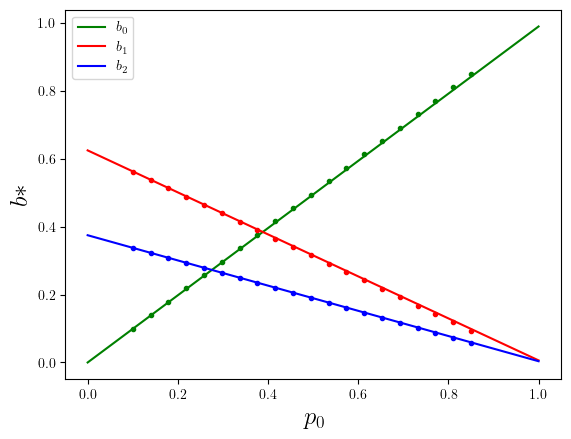

/Users/dlacoste/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/dlacoste/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


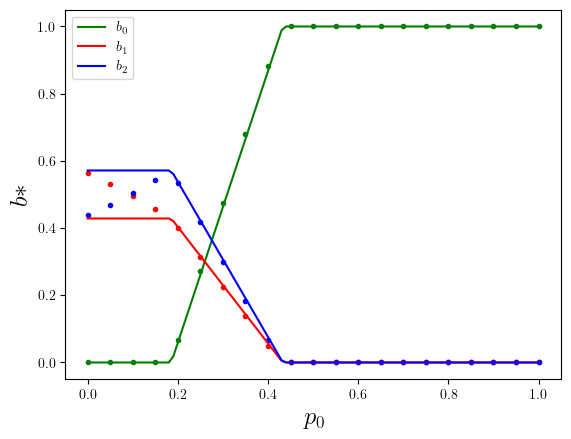

In [17]:
p=np.array([0.2,0.5,0.3])   #Same parameters of Amshuman
od=np.array([[6,0,0],
         [0,2,0],           #Diagonal odds (specific case of non-diag, but it works since we're constructing a more general approach)
         [0,0,3]])

ond=np.array([[2,2/3,1],
         [5/6,5/3,5/6],     #Non-diagonal odds
         [1,2/3,2]])
figureKKT(od,p,'KKTdiag.pdf')
plt.show()
figureKKT(ond,p,'KKTnondiag.pdf')

In [18]:
#Using the maximization directly with KKT conditions instead of using "maximize" it gives the same correct results!

NEW GAME, THE ENVIRONMENT DOESN' T ALLOW THE THIRD HORSE TO WIN, IT APPEARS p2=b2=0, THE GAME BECOMES ALWAYS NON FULLY MIXING

In [19]:
#Case in which both p2=0 and b2=0, so that it will be useless to use the last row and last column
p=(0.2,0.8,0)

#bets optimum for diagonal odds
#figure(od,p,'diag.pdf')
show()


#bets optimum for non diagonal odds
#figure(ond,p,'non-diag-inv.pdf')
show()

In [20]:
#As we can see, the theoretical line doesn't work because the game is now non-fully mixing for both the players (p2=b2=0)

#Let's reduce it to a 2x2 game since 2 strategies are not useful both for player 1 and 2

In [21]:
#Theoretical maximization but for a 2x2 matrix game and a 2-d environment strategy
def bbest2(o,p):
    S=np.array([])
    oi=np.linalg.inv(o)
    for i in range(len(o)):
        for j in range(len(o)):
            S=np.append(S,oi[i,j]/sum(oi[:,j]))   #Constructing eq. 12's \omega_xy
            
    S=np.reshape(S,(2,2))        #making S to be a matrix
    S=S*p                        #Pointwise multiplication (eq 14 without the sum over y)
    b=np.array([])
    for bi in S:
        b=np.append(b,sum(bi))   #this gives the sum over y
    b/=sum(b)                    #normalization I don't get why
    return b

In [22]:
def figure2x2(o,p,ored,pred):  #It still needs the entire matrix and p inputs just for the minimization done by "maxim", the important
                               #thing is that the theoretical line is instead using a 2x2 one now
    for i in range(21):
        p0=i/20
        p1=p[1]/(p[2]+p[1])*(20-i)/20
        p2=p[2]/(p[2]+p[1])*(20-i)/20
        px=np.array([p0,p1,p2])
        oi=np.linalg.inv(o)
        b0,b1,b2=maxim(o,px)
        #print(p0)
        #print(b1)
        plot(p0,b0,'.g')
        plot(p0,b1,'.r')
        plot(p0,b2,'.b')
    
    
    
    b0=[]
    b1=[]
    for i in range(101):
        p0=i/100
        p1=1-p0
        px=np.array([p0,p1])
        bx=bbest2(ored,px)                    #It actually doesn't need the ored inserted, cuz constrained in normalization
        
        
        for j in range(2):
            if bx[j]<0:
                bx[j]=0                           #I added this 'for' loop since it was checking if only bx[0] was between 0 and 1, now all
                bx/=sum(bx)
            if bx[j]>1:
                bx=np.array([0,0,0])
                bx[j]=1
        
        b0.append(bx[0])
        b1.append(bx[1])
        
    pstar=(np.sum(oi[:,0]))/np.sum(oi)
    print(pstar)   
        
#    plt.plot(pstar*np.ones(50),np.linspace(0,1),linestyle='dashed',color='black',label='p0*')   
    plot(np.arange(0,1.01,0.01),b0,'g',label=r'$b_0^*$')
    plot(np.arange(0,1.01,0.01),b1,'r',label=r'$b_1^*$')
   

0.24999999999999997


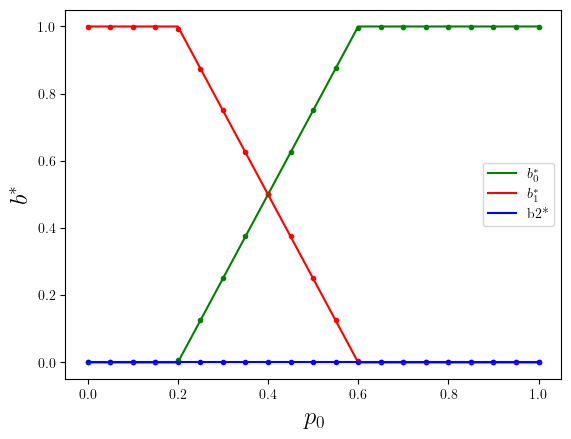

In [23]:
#Using reduced strategy and reduced matrix since the result will have b2=0 already known
p2=(0.2,0.8)
ond2=[[2,2/3],[5/6,5/3]]
figure2x2(ond,p,ond2,p2)

plot(np.arange(0,1.01,0.01),np.zeros(101),'b',label='b2*')#plotting b2=0 since we already knew it
plt.xlabel(r'$p_0$',fontsize=18)
plt.ylabel(r'$b^*$',fontsize=18)
plt.legend()
plt.savefig('non-diag-red.pdf')

#The reduction obviously works since is b3=0 and p3=0, while we can' t show it WHEN b0=0 because p0 will not be always=0 since we have it on the x axis from 0 to 1

In [24]:
#As we can see, the theoretical line for a 2x2 matrix matches the correct maximization done with a 3x3 (indeed for maxim is not relevant to assume fully mixing)